1. DATA UNDERSTANDING

1.1 Memuat Dataset

In [1]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

# --- 1. Memuat Dataset ---
print("--- 1. Memuat Dataset ---")
try:
    df = pd.read_csv('loan_data_2007_2014.csv')
    print("Dataset berhasil dimuat ke dalam DataFrame 'df'.\n")
except FileNotFoundError:
    print("Error: File dataset tidak ditemukan. Pastikan nama file dan path sudah benar.")
# Membuat DataFrame dummy untuk demonstrasi jika terjadi error pemuatan
    data = {
        'loan_status': ['Fully Paid'] * 700 + ['Charged Off'] * 150 + ['Current'] * 100 + ['Late (31-120 days)'] * 50
    }
    df = pd.DataFrame(data)
    print("Menggunakan data dummy untuk visualisasi demo.")

--- 1. Memuat Dataset ---


C:\Users\YOGA 7\AppData\Local\Temp\ipykernel_19856\2450480771.py:11: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('loan_data_2007_2014.csv')


Dataset berhasil dimuat ke dalam DataFrame 'df'.



1.2 Analisis Struktur Dataset

In [2]:
# --- 2. Analisis Struktur Dataset (Jumlah Baris dan Kolom) ---
print("--- 2. Analisis Struktur Dataset ---")
# Menampilkan 5 baris pertama data
print("5 Baris Pertama Dataset:")
print(df.head())
print("-" * 50)

# Menampilkan dimensi dataset
jumlah_baris = df.shape[0]
jumlah_kolom = df.shape[1]
print(f"Jumlah Baris (Observasi): {jumlah_baris}")
print(f"Jumlah Kolom (Atribut): {jumlah_kolom}\n")
print("-" * 50)

# Mengidentifikasi dan memahami setiap atribut/kolom data 
print("Informasi Kolom (Tipe Data & Nilai Non-Null):")
df.info()
print("-" * 50)

--- 2. Analisis Struktur Dataset ---
5 Baris Pertama Dataset:
   Unnamed: 0       id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0           0  1077501    1296599       5000         5000           4975.0   
1           1  1077430    1314167       2500         2500           2500.0   
2           2  1077175    1313524       2400         2400           2400.0   
3           3  1076863    1277178      10000        10000          10000.0   
4           4  1075358    1311748       3000         3000           3000.0   

         term  int_rate  installment grade  ... total_bal_il il_util  \
0   36 months     10.65       162.87     B  ...          NaN     NaN   
1   60 months     15.27        59.83     C  ...          NaN     NaN   
2   36 months     15.96        84.33     C  ...          NaN     NaN   
3   36 months     13.49       339.31     C  ...          NaN     NaN   
4   60 months     12.69        67.79     B  ...          NaN     NaN   

  open_rv_12m open_rv_24m  max_bal_b

1.3 Eksplorasi Awal: Statistik Deskriptif dan Missing Values

In [3]:
# Statistik Deskriptif untuk data numerik 
print("Statistik Deskriptif untuk Kolom Numerik:")
print(df.describe().T) # Transpose untuk tampilan yang lebih rapi
print("-" * 50)

# Statistik Deskriptif untuk data kategorikal (object)
print("Statistik Deskriptif untuk Kolom Kategorikal:")
print(df.describe(include='object').T)
print("-" * 50)

# Mengecek Nilai Hilang (Missing Values) 
print("Jumlah Nilai Hilang per Kolom (diurutkan):")
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_values = missing_values[missing_values > 0]
if not missing_values.empty:
    print(missing_values)
else:
    print("Tidak ditemukan nilai hilang pada dataset.")
print("-" * 50)

Statistik Deskriptif untuk Kolom Numerik:
                                count          mean           std       min  \
Unnamed: 0                   466285.0  2.331420e+05  1.346050e+05      0.00   
id                           466285.0  1.307973e+07  1.089371e+07  54734.00   
member_id                    466285.0  1.459766e+07  1.168237e+07  70473.00   
loan_amnt                    466285.0  1.431728e+04  8.286509e+03    500.00   
funded_amnt                  466285.0  1.429180e+04  8.274371e+03    500.00   
funded_amnt_inv              466285.0  1.422233e+04  8.297638e+03      0.00   
int_rate                     466285.0  1.382924e+01  4.357587e+00      5.42   
installment                  466285.0  4.320612e+02  2.434855e+02     15.67   
annual_inc                   466281.0  7.327738e+04  5.496357e+04   1896.00   
dti                          466285.0  1.721876e+01  7.851121e+00      0.00   
delinq_2yrs                  466256.0  2.846784e-01  7.973651e-01      0.00   
inq_last_6

1.4 Eksplorasi Awal: Visualisasi Distribusi Variabel

--- 1. Pemeriksaan Nilai Unik dalam Kolom 'loan_status' ---
loan_status
Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: count, dtype: int64
------------------------------------------------------------
--- 2. Visualisasi Frekuensi Absolut Kelas 'loan_status' ---


C:\Users\YOGA 7\AppData\Local\Temp\ipykernel_19856\1271049079.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


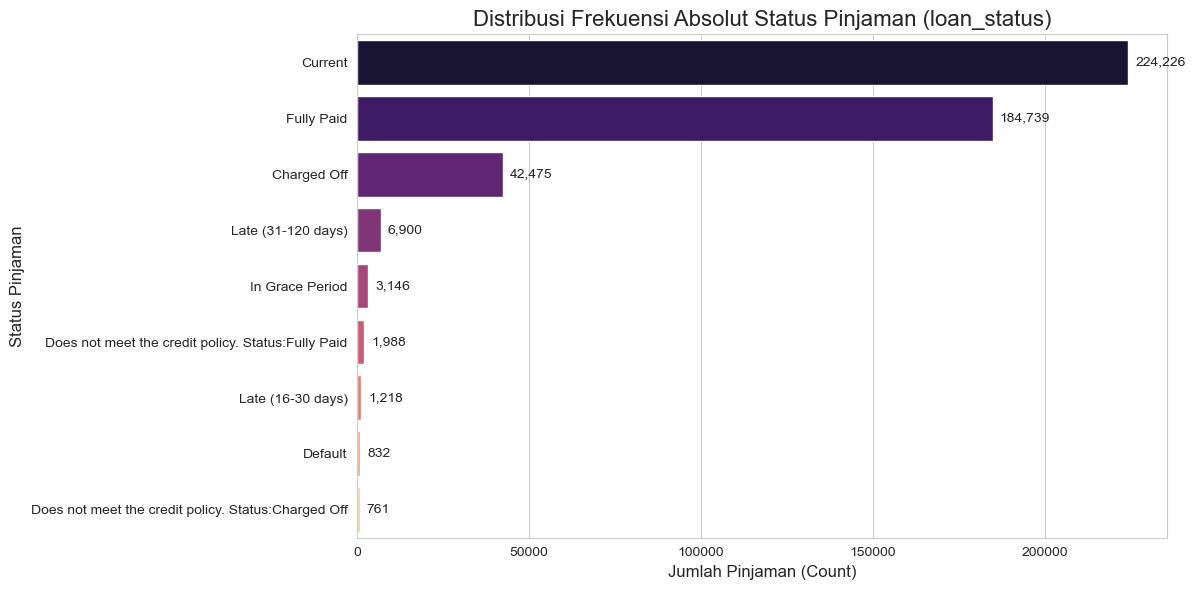

------------------------------------------------------------
--- 3. Visualisasi Proporsi (Persentase) Kelas 'loan_status' ---


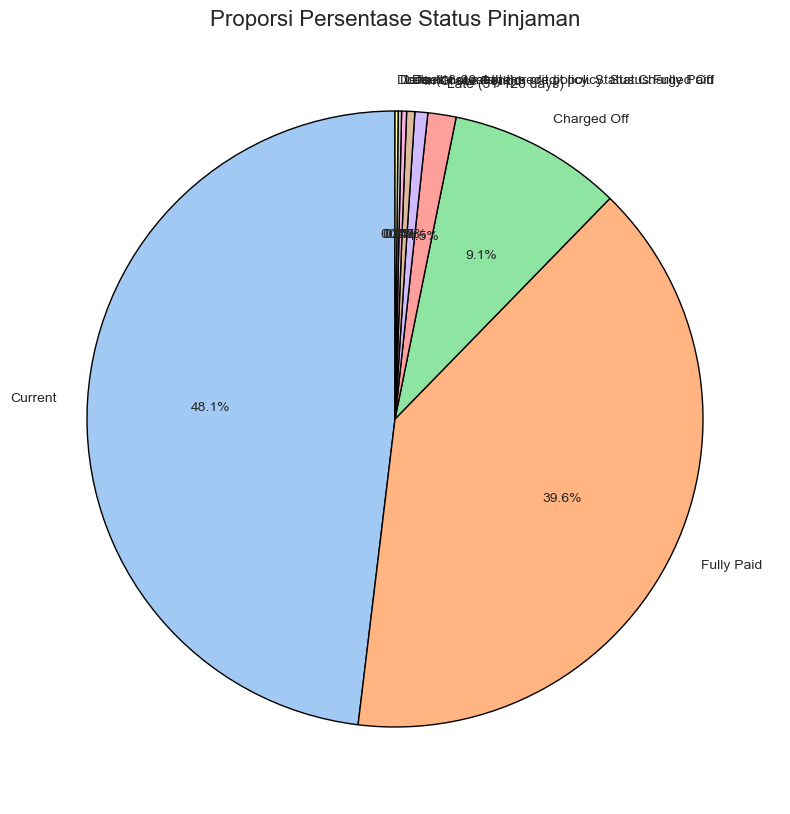


Persentase Detail Kelas Target:
loan_status
Current                                                48.09%
Fully Paid                                             39.62%
Charged Off                                             9.11%
Late (31-120 days)                                      1.48%
In Grace Period                                         0.67%
Does not meet the credit policy. Status:Fully Paid      0.43%
Late (16-30 days)                                       0.26%
Default                                                 0.18%
Does not meet the credit policy. Status:Charged Off     0.16%
Name: proportion, dtype: object
------------------------------------------------------------
--- Analisis Awal Distribusi 'loan_status' ---
1. Kategori Dominan:
   - Catatan: Kelas 'Fully Paid' dan 'Current' kemungkinan besar mendominasi data.
2. Isu Class Imbalance:
   - Catatan: Jika kelas 'Charged Off' (yang mewakili kegagalan bayar / risiko tinggi) memiliki proporsi yang jauh lebih kecil da

In [4]:
# Tetapkan TARGET_COLUMN
TARGET_COLUMN = "loan_status"

# --- 1. Pemeriksaan Nilai Unik dalam Kolom Target ---
print("--- 1. Pemeriksaan Nilai Unik dalam Kolom 'loan_status' ---")
loan_status_counts = df[TARGET_COLUMN].value_counts()
print(loan_status_counts)
print("-" * 60)

# --- 2. Visualisasi Frekuensi Absolut ---
print("--- 2. Visualisasi Frekuensi Absolut Kelas 'loan_status' ---")

plt.figure(figsize=(12, 6))
# Menggunakan countplot untuk menampilkan jumlah kemunculan setiap kategori
# 'order' memastikan urutan kategori dari terbanyak ke tersedikit
ax = sns.countplot(
    data=df,
    y=TARGET_COLUMN, # Menggunakan y=TARGET_COLUMN agar plot horizontal (lebih mudah dibaca jika banyak kategori)
    order=loan_status_counts.index,
    palette='magma'
)
plt.title('Distribusi Frekuensi Absolut Status Pinjaman (loan_status)', fontsize=16)
plt.xlabel('Jumlah Pinjaman (Count)', fontsize=12)
plt.ylabel('Status Pinjaman', fontsize=12)
plt.savefig('ax.png', dpi=300, transparent=True, bbox_inches='tight')

# Menambahkan label count di samping bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_width()):,}', 
                (p.get_width(), p.get_y() + p.get_height() / 2.), 
                ha = 'left', va = 'center', 
                xytext = (5, 0), 
                textcoords = 'offset points')

plt.tight_layout()
plt.show()
print("-" * 60)


# --- 3. Visualisasi Proporsi (Persentase) dan Isu Imbalance ---
print("--- 3. Visualisasi Proporsi (Persentase) Kelas 'loan_status' ---")

# Hitung persentase
loan_status_percent = df[TARGET_COLUMN].value_counts(normalize=True) * 100

plt.figure(figsize=(10, 10))
# Menggunakan Pie Chart atau Bar Plot Persentase
plt.pie(
    loan_status_percent, 
    labels=loan_status_percent.index, 
    autopct='%1.1f%%', # Format persentase
    startangle=90, 
    colors=sns.color_palette("pastel"),
    wedgeprops={'edgecolor': 'black'}
)
plt.title('Proporsi Persentase Status Pinjaman', fontsize=16)
plt.show()

print("\nPersentase Detail Kelas Target:")
print(loan_status_percent.round(2).astype(str) + '%')

print("-" * 60)

# --- Analisis dan Kesimpulan Awal ---
print("--- Analisis Awal Distribusi 'loan_status' ---")
print("1. Kategori Dominan:")
print("   - Catatan: Kelas 'Fully Paid' dan 'Current' kemungkinan besar mendominasi data.")
print("2. Isu Class Imbalance:")
print("   - Catatan: Jika kelas 'Charged Off' (yang mewakili kegagalan bayar / risiko tinggi) memiliki proporsi yang jauh lebih kecil daripada 'Fully Paid' dan 'Current', maka data mengalami **Class Imbalance**.")
print("3. Keputusan Selanjutnya:")
print("   - Pinjaman dengan status 'Charged Off', 'Default', dan 'Late (31-120 days)' akan dikategorikan sebagai **Bad Loan (1)**.")
print("   - Pinjaman dengan status 'Fully Paid' dan 'Current' akan dikategorikan sebagai **Good Loan (0)**.")
print("   - Isu Class Imbalance ini akan memerlukan penanganan khusus di tahap Data Preparation (misalnya: oversampling, undersampling, atau menggunakan metrik evaluasi seperti ROC-AUC dan F1-Score, bukan hanya akurasi).")

2. Feature Engineering

2.1 Definisi Kategori Resiko

In [5]:
# --- 1. Mendefinisikan Kategori Risiko (Good vs. Bad) ---
print("--- 1. Mendefinisikan Kategori Risiko (Good vs. Bad) ---")

# Kategori yang secara umum dianggap sebagai "Bad Loan" (Gagal Bayar / Risiko Tinggi = 1)
# Ini adalah pinjaman yang mengalami kerugian atau keterlambatan signifikan.
bad_loan_status = [
    'Charged Off',
    'Default',
    'Late (31-120 days)',
    'Late (16-30 days)',
    'Does not meet the credit policy. Status:Charged Off'
    # Tambahkan kategori lain jika ada di dataset Anda, yang berarti gagal atau bermasalah
]

# Kategori yang secara umum dianggap sebagai "Good Loan" (Lancar / Risiko Rendah = 0)
# Ini adalah pinjaman yang berhasil dilunasi atau masih berjalan lancar.
good_loan_status = [
    'Fully Paid',
    'Current',
    'Does not meet the credit policy. Status:Fully Paid'
    # 'In Grace Period' dan status transisional lainnya bisa dihapus
]

print("Status yang dikategorikan sebagai BAD (1):", bad_loan_status)
print("Status yang dikategorikan sebagai GOOD (0):", good_loan_status)
print("-" * 60)

--- 1. Mendefinisikan Kategori Risiko (Good vs. Bad) ---
Status yang dikategorikan sebagai BAD (1): ['Charged Off', 'Default', 'Late (31-120 days)', 'Late (16-30 days)', 'Does not meet the credit policy. Status:Charged Off']
Status yang dikategorikan sebagai GOOD (0): ['Fully Paid', 'Current', 'Does not meet the credit policy. Status:Fully Paid']
------------------------------------------------------------


2.2 Pembuatan Kolom Target Biner 'Credit_risk'

In [6]:
# --- 2. Feature Engineering: Pembuatan Kolom TARGET Biner 'Credit_Risk' ---
print("--- 2. Feature Engineering: Pembuatan Kolom TARGET Biner 'Credit_Risk' ---")

# Inisialisasi kolom baru dengan nilai NaN
df['Credit_Risk'] = np.nan

# Mapping Status Pinjaman ke Nilai Biner:
# 1. Menandai semua "Bad Loan" sebagai 1
df.loc[df[TARGET_COLUMN].isin(bad_loan_status), 'Credit_Risk'] = 1

# 2. Menandai semua "Good Loan" sebagai 0
df.loc[df[TARGET_COLUMN].isin(good_loan_status), 'Credit_Risk'] = 0

print("Kolom 'Credit_Risk' berhasil dibuat.")
print("-" * 60)

--- 2. Feature Engineering: Pembuatan Kolom TARGET Biner 'Credit_Risk' ---
Kolom 'Credit_Risk' berhasil dibuat.
------------------------------------------------------------


2.3 Penanganan Data tidak relevan

In [7]:
# --- 3. Penanganan Data yang Tidak Relevan (Status Transisional) ---
# Status transisional yang tidak termasuk Good/Bad (misalnya 'In Grace Period', 'Issued', dll.) 
# harus dihapus karena tidak memberikan indikasi hasil akhir pinjaman yang jelas.

# Identifikasi baris yang memiliki nilai NaN di kolom Credit_Risk (yang berarti tidak termasuk Good atau Bad)
rows_to_drop = df[df['Credit_Risk'].isnull()].shape[0]

if rows_to_drop > 0:
    print(f"Jumlah baris yang dihapus (Status Transisional/Tidak Relevan): {rows_to_drop}")
    print("Status Pinjaman yang Dihapus:")
    print(df[df['Credit_Risk'].isnull()][TARGET_COLUMN].unique())
    
    # Hapus baris dengan nilai NaN pada kolom Credit_Risk
    df.dropna(subset=['Credit_Risk'], inplace=True)
    
    # Ubah tipe data Credit_Risk menjadi integer (karena ini adalah klasifikasi biner)
    df['Credit_Risk'] = df['Credit_Risk'].astype(int)
    print(f"Jumlah baris tersisa setelah penghapusan: {df.shape[0]}")
else:
    print("Tidak ada baris yang dihapus karena semua status sudah diklasifikasikan.")

print("-" * 60)

Jumlah baris yang dihapus (Status Transisional/Tidak Relevan): 3146
Status Pinjaman yang Dihapus:
['In Grace Period']
Jumlah baris tersisa setelah penghapusan: 463139
------------------------------------------------------------


2.4 Visualisasi Distribusi Akhir Variabel Target Biner

--- 4. Visualisasi Distribusi Akhir TARGET_COLUMN ('Credit_Risk') ---


C:\Users\YOGA 7\AppData\Local\Temp\ipykernel_19856\3715347715.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


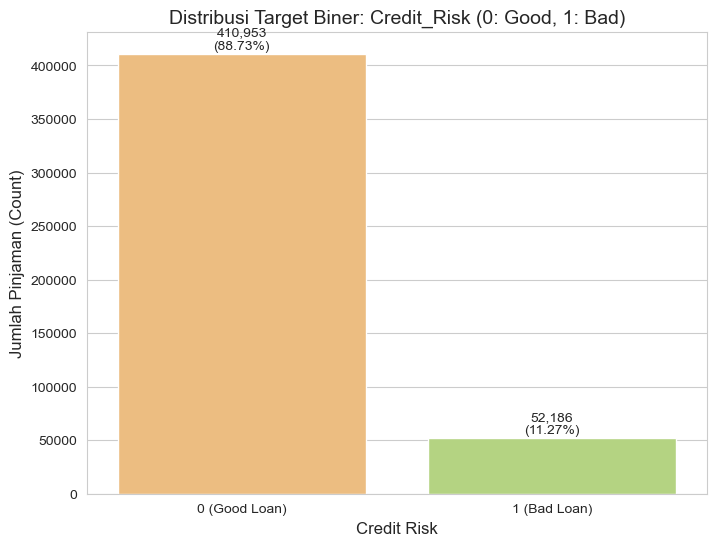


Distribusi Kelas Target Biner:
Good Loan (0): 410953 (88.73%)
Bad Loan (1): 52186 (11.27%)
------------------------------------------------------------


In [8]:
# --- 4. Visualisasi Distribusi Akhir Variabel Target Biner ---
print("--- 4. Visualisasi Distribusi Akhir TARGET_COLUMN ('Credit_Risk') ---")

target_counts = df['Credit_Risk'].value_counts()
target_percent = df['Credit_Risk'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 6))
ax = sns.barplot(
    x=target_counts.index, 
    y=target_counts.values, 
    palette='RdYlGn', 
    order=[0, 1] # Memastikan urutan 0 (Good) dan 1 (Bad)
)

# Mengganti label x-axis menjadi deskripsi
ax.set_xticks([0, 1])
ax.set_xticklabels(['0 (Good Loan)', '1 (Bad Loan)'])

plt.title('Distribusi Target Biner: Credit_Risk (0: Good, 1: Bad)', fontsize=14)
plt.xlabel('Credit Risk', fontsize=12)
plt.ylabel('Jumlah Pinjaman (Count)', fontsize=12)


# Menambahkan label count dan persentase di atas bar
for i, p in enumerate(ax.patches):
    count = int(p.get_height())
    percent = target_percent.iloc[i]
    ax.annotate(f'{count:,}\n({percent:.2f}%)', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points',
                fontsize=10)

plt.savefig('FeatureEngineering.png', dpi=300, transparent=True, bbox_inches='tight')
plt.show()

print("\nDistribusi Kelas Target Biner:")
print(f"Good Loan (0): {target_counts.get(0, 0)} ({target_percent.get(0, 0):.2f}%)")
print(f"Bad Loan (1): {target_counts.get(1, 0)} ({target_percent.get(1, 0):.2f}%)")
print("-" * 60)

3. EDA

In [9]:
# Ganti dengan kolom numerik yang benar dari dataset Anda
NUMERIC_COLS = ['loan_amnt', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'pub_rec', 'revol_util', 'total_acc']
# Ganti dengan kolom kategorikal yang benar dari dataset Anda
CATEGORICAL_COLS = ['term', 'grade', 'emp_length', 'home_ownership', 'verification_status', 'purpose', 'addr_state'] 
TARGET_COL = 'Credit_Risk' # Variabel target biner

# Filter kolom yang benar-benar ada di DataFrame Anda
numeric_cols_exist = [col for col in NUMERIC_COLS if col in df.columns]
categorical_cols_exist = [col for col in CATEGORICAL_COLS if col in df.columns]

3.1 Analisis Univariat Lanjutan pada Variabel Numerik

--- 1. Analisis Univariat: Distribusi Variabel Numerik ---


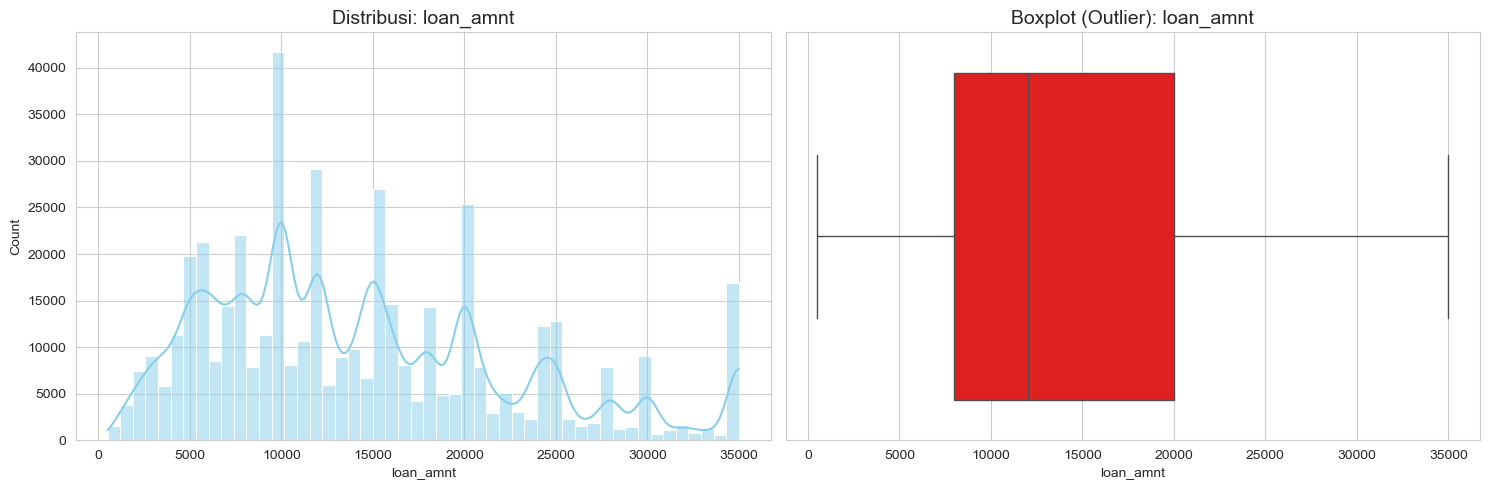

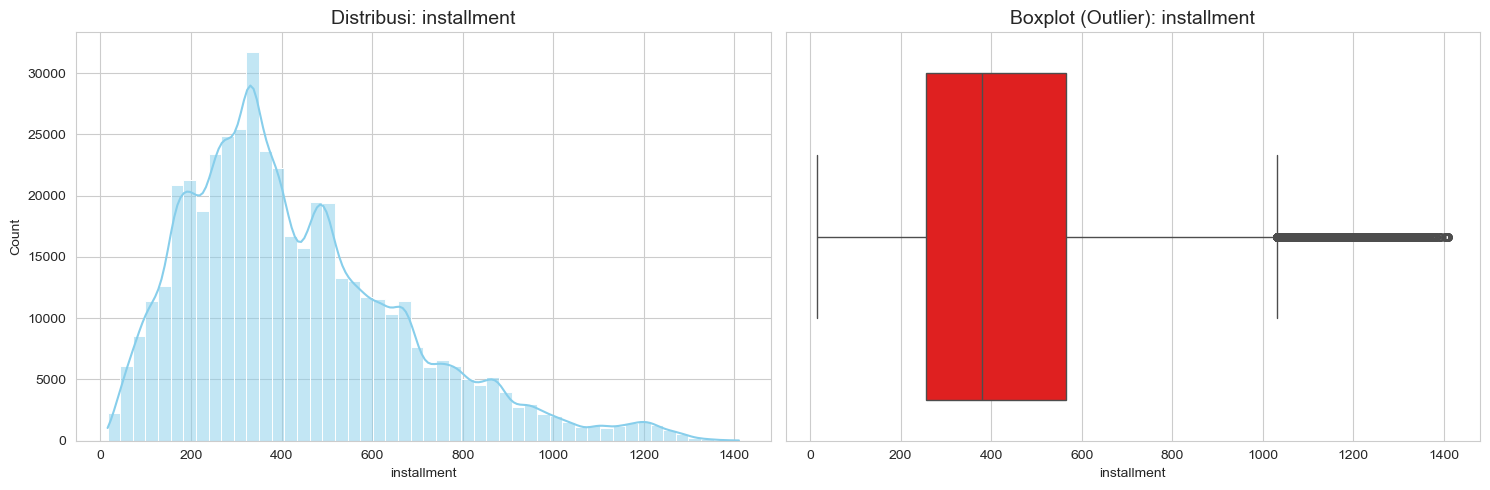

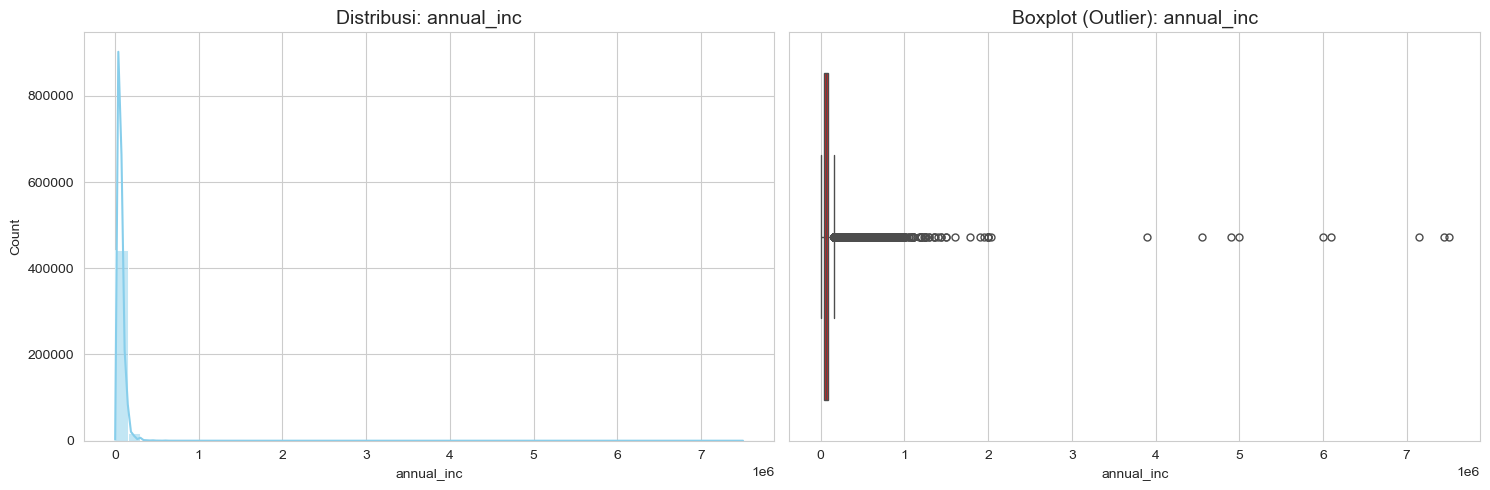

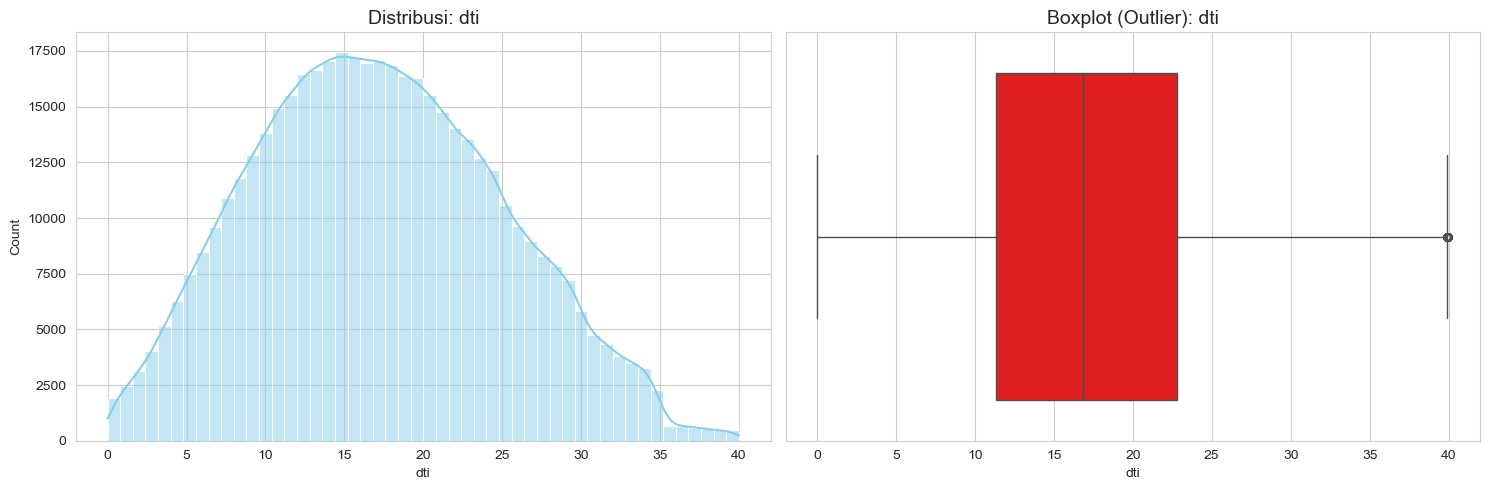

----------------------------------------------------------------------


In [14]:
# --- 1. Analisis Univariat Lanjutan pada Variabel Numerik ---
# Memeriksa distribusi data dan potensi outlier

print("--- 1. Analisis Univariat: Distribusi Variabel Numerik ---")

# Visualisasi Histogram dan Boxplot untuk Kolom Numerik
for col in numeric_cols_exist[:4]: # Hanya tampilkan 4 kolom teratas untuk ringkasan
    plt.figure(figsize=(15, 5))
    
    # Subplot 1: Histogram (untuk melihat bentuk distribusi)
    plt.subplot(1, 2, 1)
    sns.histplot(df[col].dropna(), kde=True, bins=50, color='skyblue')
    plt.title(f'Distribusi: {col}', fontsize=14)
    
    # Subplot 2: Boxplot (untuk melihat Outlier)
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col].dropna(), color='red', fliersize=5)
    plt.title(f'Boxplot (Outlier): {col}', fontsize=14)
    
    plt.tight_layout()
    plt.savefig('AnalisisUnivariat.png', dpi=300, transparent=True, bbox_inches='tight')
    plt.show()

# Catatan: Perhatikan skewness (kemiringan) dan keberadaan outlier. 
# Misalnya, 'annual_inc' mungkin sangat miring ke kanan.
print("-" * 70)

3.2 Analisis Bivariat: Numerik vs. Target Biner (Credit_Risk)

--- 2. Analisis Bivariat: Numerik vs. Credit_Risk ---


C:\Users\YOGA 7\AppData\Local\Temp\ipykernel_19856\1748473886.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=TARGET_COL, y=col, data=df, palette='viridis')


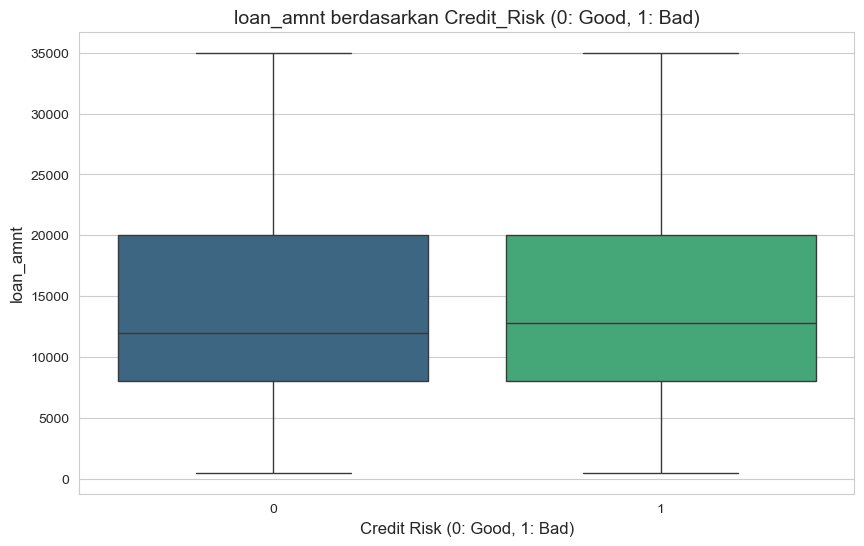


Statistik Deskriptif loan_amnt berdasarkan Credit_Risk:
Credit_Risk              0             1
count        410953.000000  52186.000000
mean          14264.342577  14624.953053
std            8268.739162   8390.633508
min             500.000000    500.000000
25%            8000.000000   8000.000000
50%           12000.000000  12800.000000
75%           20000.000000  20000.000000
max           35000.000000  35000.000000

---


C:\Users\YOGA 7\AppData\Local\Temp\ipykernel_19856\1748473886.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=TARGET_COL, y=col, data=df, palette='viridis')


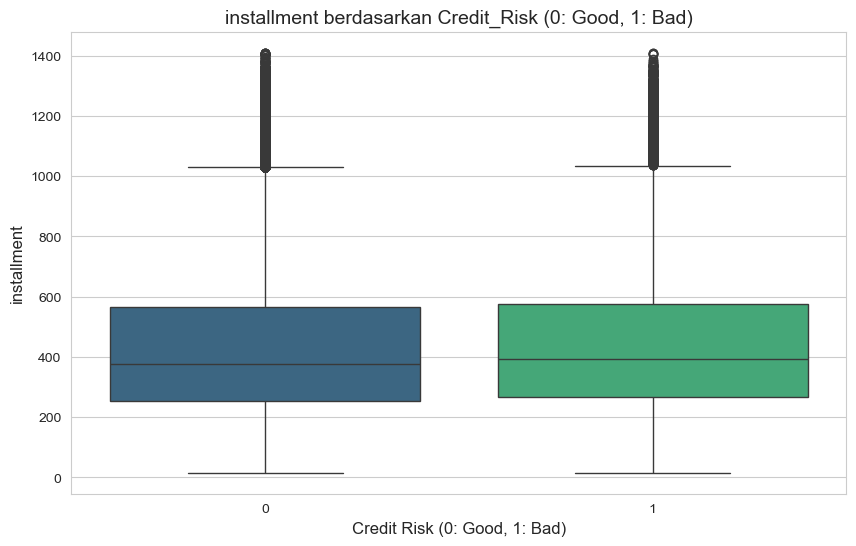


Statistik Deskriptif installment berdasarkan Credit_Risk:
Credit_Risk              0             1
count        410953.000000  52186.000000
mean            430.305676    442.587052
std             242.961979    246.432087
min              15.670000     15.910000
25%             254.820000    266.995000
50%             377.410000    392.500000
75%             564.750000    574.400000
max            1409.990000   1408.130000

---


C:\Users\YOGA 7\AppData\Local\Temp\ipykernel_19856\1748473886.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=TARGET_COL, y=col, data=df, palette='viridis')


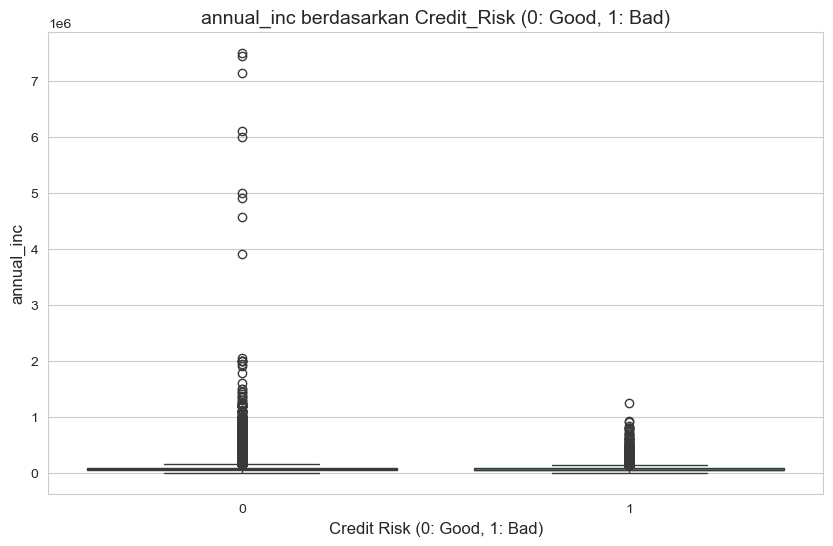


Statistik Deskriptif annual_inc berdasarkan Credit_Risk:
Credit_Risk             0             1
count        4.109490e+05  5.218600e+04
mean         7.424452e+04  6.561584e+04
std          5.641296e+04  4.121945e+04
min          1.896000e+03  2.000000e+03
25%          4.500000e+04  4.100000e+04
50%          6.400000e+04  5.700000e+04
75%          9.000000e+04  8.000000e+04
max          7.500000e+06  1.250000e+06

---


C:\Users\YOGA 7\AppData\Local\Temp\ipykernel_19856\1748473886.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=TARGET_COL, y=col, data=df, palette='viridis')


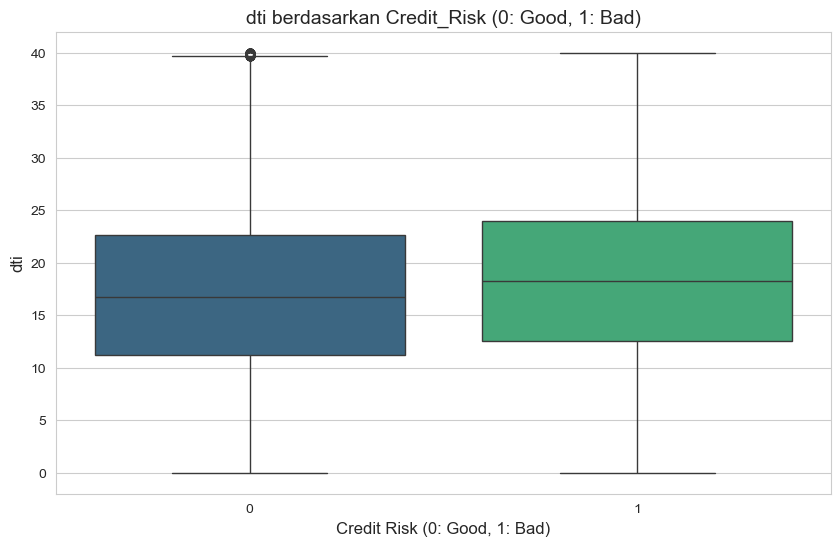


Statistik Deskriptif dti berdasarkan Credit_Risk:
Credit_Risk              0             1
count        410953.000000  52186.000000
mean             17.068770     18.304479
std               7.836358      7.862675
min               0.000000      0.000000
25%              11.220000     12.530000
50%              16.680000     18.280000
75%              22.600000     23.960000
max              39.990000     39.980000

---
----------------------------------------------------------------------


In [17]:
# --- 2. Analisis Bivariat: Numerik vs. Target Biner (Credit_Risk) ---
# Membandingkan distribusi Good Loan (0) dan Bad Loan (1)
print("--- 2. Analisis Bivariat: Numerik vs. Credit_Risk ---")

for col in numeric_cols_exist[:4]: # Hanya tampilkan 4 kolom teratas untuk ringkasan
    plt.figure(figsize=(10, 6))
    
    # Menggunakan Boxplot untuk membandingkan rata-rata/median dan sebaran
    sns.boxplot(x=TARGET_COL, y=col, data=df, palette='viridis')
    plt.title(f'{col} berdasarkan Credit_Risk (0: Good, 1: Bad)', fontsize=14)
    plt.xlabel('Credit Risk (0: Good, 1: Bad)', fontsize=12)
    plt.ylabel(col, fontsize=12)
    plt.savefig(f'BivariatNumerik_{col}.png', dpi=300, transparent=True, bbox_inches='tight')
    plt.show()
    
    # Menampilkan statistik perbandingan
    print(f"\nStatistik Deskriptif {col} berdasarkan Credit_Risk:")
    print(df.groupby(TARGET_COL)[col].describe().T)
    print("\n---")

# Catatan: Cari perbedaan signifikan pada rata-rata atau median. 
# Contoh: Apakah rata-rata 'annual_inc' lebih rendah untuk Bad Loan (1)?
print("-" * 70)

3.3 Analisis Bivariat: Kategorikal vs. Target Biner (Credit_Risk)

--- 3. Analisis Bivariat: Kategorikal vs. Credit_Risk ---


C:\Users\YOGA 7\AppData\Local\Temp\ipykernel_19856\4086559410.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=risk_ratio.index, y=risk_ratio.values, palette='Reds_d')


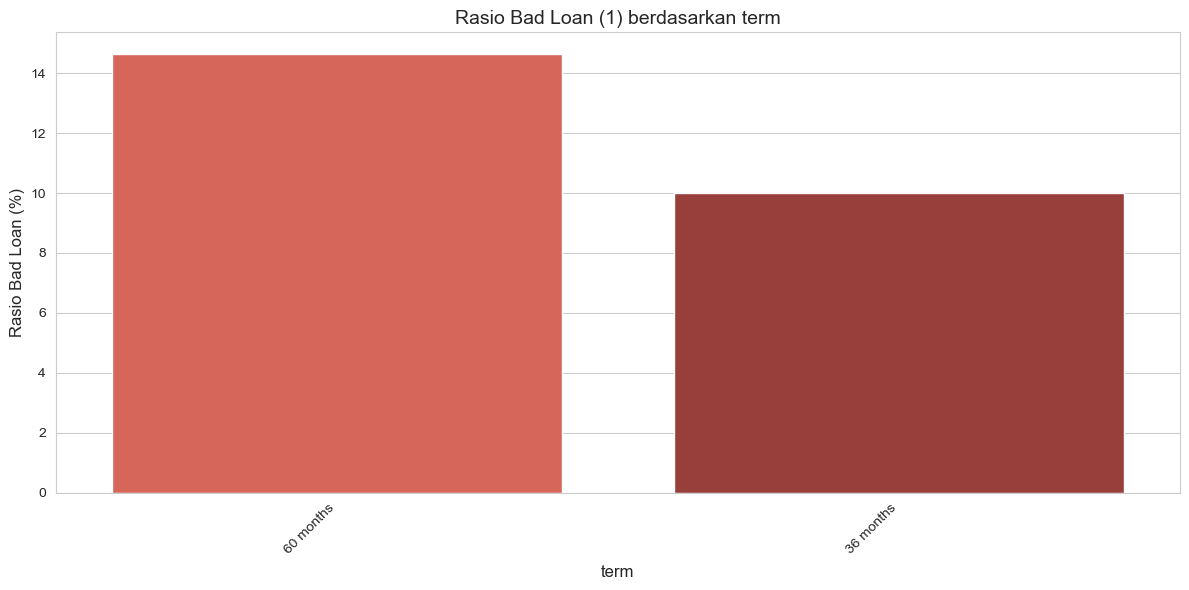


Rasio Bad Loan (%) untuk term:
term
60 months    14.63%
36 months     9.99%
Name: Credit_Risk, dtype: object

---


C:\Users\YOGA 7\AppData\Local\Temp\ipykernel_19856\4086559410.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=risk_ratio.index, y=risk_ratio.values, palette='Reds_d')


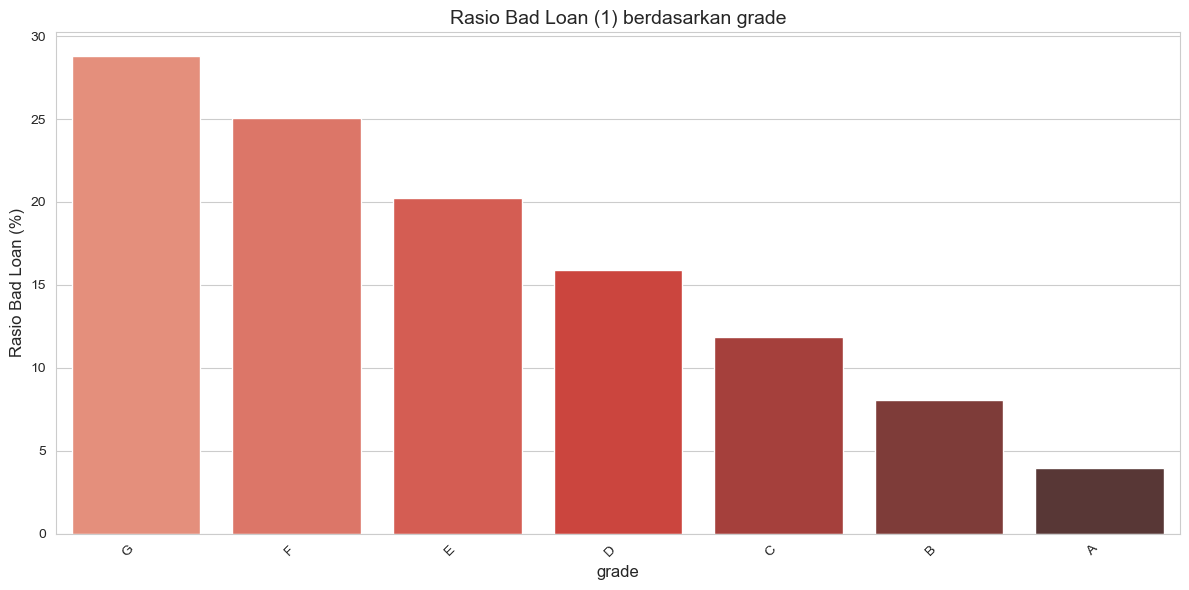


Rasio Bad Loan (%) untuk grade:
grade
G    28.79%
F    25.04%
E    20.22%
D    15.93%
C    11.85%
B     8.08%
A     3.96%
Name: Credit_Risk, dtype: object

---


C:\Users\YOGA 7\AppData\Local\Temp\ipykernel_19856\4086559410.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=risk_ratio.index, y=risk_ratio.values, palette='Reds_d')


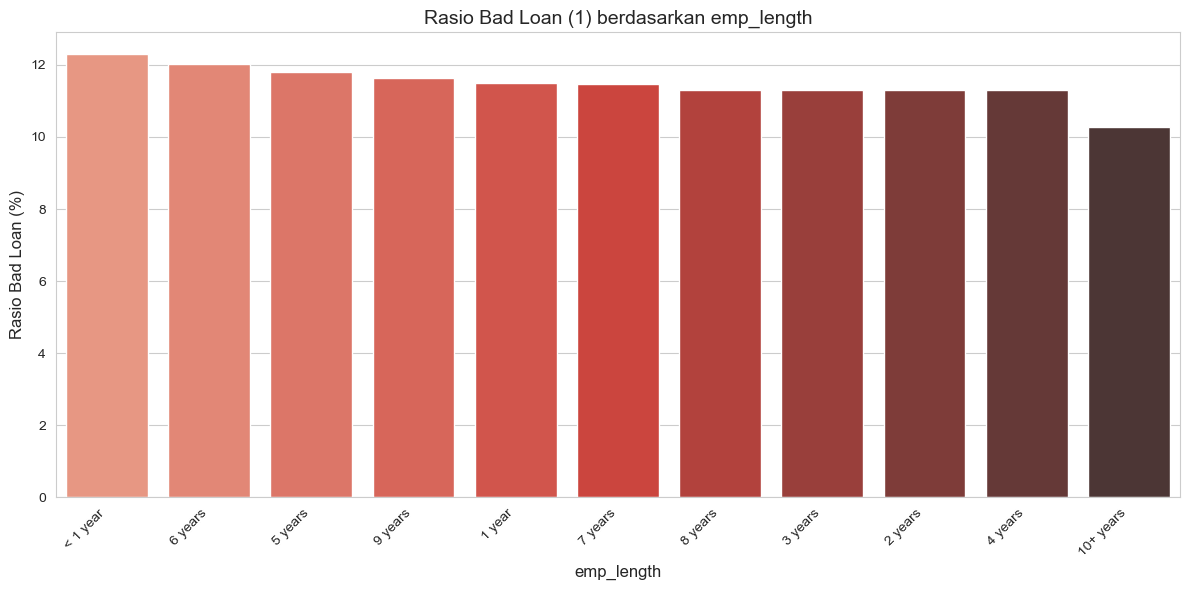


Rasio Bad Loan (%) untuk emp_length:
emp_length
< 1 year     12.29%
6 years      12.02%
5 years      11.81%
9 years      11.64%
1 year       11.51%
7 years      11.46%
8 years      11.31%
3 years      11.31%
2 years      11.31%
4 years      11.31%
10+ years    10.28%
Name: Credit_Risk, dtype: object

---


C:\Users\YOGA 7\AppData\Local\Temp\ipykernel_19856\4086559410.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=risk_ratio.index, y=risk_ratio.values, palette='Reds_d')


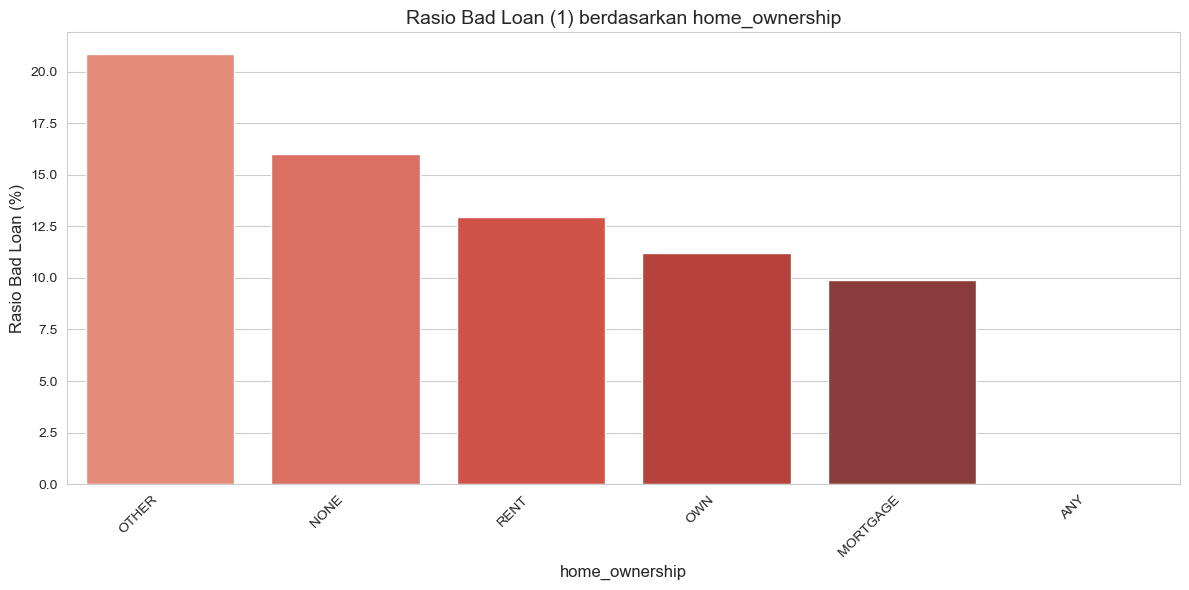


Rasio Bad Loan (%) untuk home_ownership:
home_ownership
OTHER       20.88%
NONE         16.0%
RENT        12.96%
OWN         11.22%
MORTGAGE     9.92%
ANY           0.0%
Name: Credit_Risk, dtype: object

---
----------------------------------------------------------------------


In [18]:
# --- 3. Analisis Bivariat: Kategorikal vs. Target Biner (Credit_Risk) ---
# Memeriksa rasio default (Bad Loan = 1) di setiap kategori

print("--- 3. Analisis Bivariat: Kategorikal vs. Credit_Risk ---")

for col in categorical_cols_exist[:4]: # Hanya tampilkan 4 kolom teratas untuk ringkasan
    
    # Filter kolom kategorikal dengan jumlah unik yang wajar (max 15 kategori)
    if df[col].nunique() > 15:
        print(f"Melewati kolom '{col}' karena terlalu banyak kategori ({df[col].nunique()}).")
        continue

    plt.figure(figsize=(12, 6))
    
    # Hitung Rasio Bad Loan (1) per Kategori
    # Normalisasi 'index' = True agar mendapatkan persentase dalam grup 'Credit_Risk'
    risk_ratio = df.groupby(col)[TARGET_COL].mean().sort_values(ascending=False) * 100
    
    # Visualisasi Bar Plot Rasio Risiko
    sns.barplot(x=risk_ratio.index, y=risk_ratio.values, palette='Reds_d')
    
    plt.title(f'Rasio Bad Loan (1) berdasarkan {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Rasio Bad Loan (%)', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig(f'BivariatKategorikal_{col}.png', dpi=300, transparent=True, bbox_inches='tight')
    plt.show()
    
    print(f"\nRasio Bad Loan (%) untuk {col}:")
    print(risk_ratio.round(2).astype(str) + '%')
    print("\n---")

# Catatan: Cari kategori dengan rasio Bad Loan (1) yang jauh lebih tinggi. 
# Contoh: Grade 'G' kemungkinan memiliki rasio Bad Loan tertinggi.
print("-" * 70)

3.4 Pemeriksaan Korelasi antar Variabel Numerik

--- 4. Pemeriksaan Korelasi (Multivariat) ---


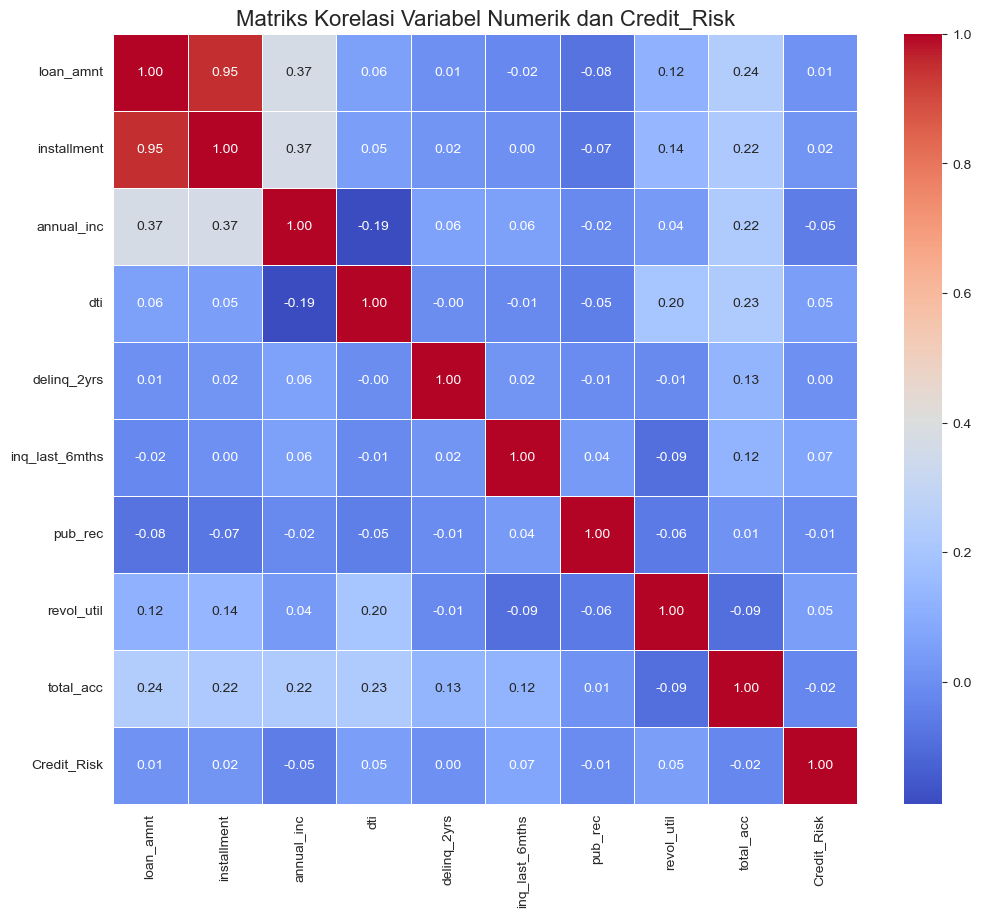


Korelasi Credit_Risk (Target) dengan Variabel Numerik:
Credit_Risk       1.000000
inq_last_6mths    0.073428
revol_util        0.051858
dti               0.049781
installment       0.015956
loan_amnt         0.013766
delinq_2yrs       0.003285
pub_rec          -0.008201
total_acc        -0.022363
annual_inc       -0.049626
Name: Credit_Risk, dtype: float64
----------------------------------------------------------------------


In [19]:
# --- 4. Pemeriksaan Korelasi antar Variabel Numerik ---
print("--- 4. Pemeriksaan Korelasi (Multivariat) ---")

# Hitung matriks korelasi hanya untuk kolom numerik
correlation_matrix = df[numeric_cols_exist + [TARGET_COL]].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    cmap='coolwarm', 
    fmt=".2f",
    linewidths=.5
)
plt.title('Matriks Korelasi Variabel Numerik dan Credit_Risk', fontsize=16)
plt.savefig(f'Matriks Korelasi.png', dpi=300, transparent=True, bbox_inches='tight')
plt.show()

print("\nKorelasi Credit_Risk (Target) dengan Variabel Numerik:")
# Tampilkan korelasi dengan Credit_Risk, diurutkan
print(correlation_matrix[TARGET_COL].sort_values(ascending=False))

# Catatan: 
# 1. Cari korelasi tinggi (> 0.5 atau < -0.5) antara Credit_Risk dan fitur (independen) tertentu. Fitur ini penting.
# 2. Cari korelasi tinggi antar fitur independen (*Multicollinearity*). Fitur yang berkorelasi sangat tinggi (misalnya > 0.8) mungkin perlu dihapus salah satunya di tahap Data Preparation.
print("-" * 70)

4. Data Preparation

In [20]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy.stats import skew

# Atur opsi Pandas agar output lebih rapi
pd.set_option('display.max_columns', 50) 
pd.set_option('display.width', 1000)
# --- ASUMSI DATA ---
# Diasumsikan DataFrame 'df' sudah ada dan berisi kolom 'Credit_Risk' biner.
# Variabel yang digunakan disesuaikan dengan Data Dictionary LC (Lending Club)

TARGET_COL = 'Credit_Risk'
CATEGORICAL_COLS = ['term', 'grade', 'emp_length', 'home_ownership', 'verification_status', 'purpose'] 
# Menambahkan beberapa kolom numerik dari hasil korelasi dan EDA umum
NUMERIC_COLS = ['loan_amnt', 'installment', 'annual_inc', 'dti', 'revol_util', 'inq_last_6mths', 'total_acc']

# --- CONTOH PEMBUATAN DATA DUMMY UNTUK DEMONSTRASI ---
# Anda harus mengganti bagian ini dengan data Anda yang sebenarnya!
# Data dummy meniru masalah umum seperti Missing Values dan Outliers
np.random.seed(42)
n_rows = 1000
df = pd.DataFrame({
    'Credit_Risk': np.random.randint(0, 2, n_rows),
    'loan_amnt': np.abs(np.random.normal(15000, 5000, n_rows)),
    'annual_inc': np.abs(np.random.lognormal(10.5, 0.8, n_rows)),
    'dti': np.random.uniform(0, 30, n_rows),
    'revol_util': np.random.uniform(0, 100, n_rows),
    'inq_last_6mths': np.random.randint(0, 5, n_rows),
    'term': np.random.choice([' 36 months', ' 60 months'], n_rows),
    'grade': np.random.choice(['A', 'B', 'C', 'D', 'E', 'F', 'G'], n_rows),
    'emp_length': np.random.choice(['< 1 year', '1 year', '10+ years', 'N/A'], n_rows),
    'total_acc': np.random.randint(5, 50, n_rows),
})
# Tambahkan Missing Values di beberapa kolom
df.loc[df.sample(frac=0.1).index, 'annual_inc'] = np.nan 
df.loc[df.sample(frac=0.05).index, 'dti'] = np.nan
df.loc[df.sample(frac=0.02).index, 'revol_util'] = np.nan

# Pastikan hanya kolom yang ada yang digunakan
CATEGORICAL_COLS = [col for col in CATEGORICAL_COLS if col in df.columns]
NUMERIC_COLS = [col for col in NUMERIC_COLS if col in df.columns]

print(f"Jumlah baris awal: {df.shape[0]}")
print("Status Missing Values awal:")
print(df.isnull().sum()[df.isnull().sum() > 0])
print("-" * 70)


# --- 1. PENANGANAN NILAI HILANG (MISSING VALUES) ---
print("--- 1. PENANGANAN NILAI HILANG (MISSING VALUES) ---")

# 1.1 Imputasi untuk Variabel Numerik
# Berdasarkan EDA, imputasi dengan Median lebih tahan terhadap outlier.

for col in NUMERIC_COLS:
    if df[col].isnull().sum() > 0:
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)
        print(f"Nilai hilang '{col}' diisi dengan Median ({median_val:.2f}).")

# 1.2 Imputasi untuk Variabel Kategorikal
# Imputasi dengan Mode (nilai paling sering)
for col in CATEGORICAL_COLS:
    if df[col].isnull().sum() > 0 or 'N/A' in df[col].unique():
        # Gantikan 'N/A' dengan mode atau kategori baru jika perlu
        mode_val = df[col].mode()[0]
        df[col].replace('N/A', mode_val, inplace=True)
        df[col].fillna(mode_val, inplace=True)
        print(f"Nilai hilang/N/A '{col}' diisi dengan Mode ({mode_val.strip()}).")

print("\nStatus Missing Values akhir:")
print(df.isnull().sum()[df.isnull().sum() > 0])
print("Semua missing values telah ditangani.")
print("-" * 70)

Jumlah baris awal: 1000
Status Missing Values awal:
annual_inc    100
dti            50
revol_util     20
dtype: int64
----------------------------------------------------------------------
--- 1. PENANGANAN NILAI HILANG (MISSING VALUES) ---
Nilai hilang 'annual_inc' diisi dengan Median (37000.04).
Nilai hilang 'dti' diisi dengan Median (14.67).
Nilai hilang 'revol_util' diisi dengan Median (49.46).
Nilai hilang/N/A 'emp_length' diisi dengan Mode (< 1 year).

Status Missing Values akhir:
Series([], dtype: int64)
Semua missing values telah ditangani.
----------------------------------------------------------------------


C:\Users\YOGA 7\AppData\Local\Temp\ipykernel_19856\128842134.py:61: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)
C:\Users\YOGA 7\AppData\Local\Temp\ipykernel_19856\128842134.py:70: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

4.2 Penanganan Skewness dan Transformation

In [21]:
# --- 2. PENANGANAN SKEWNESS DAN TRANSFORMATION ---
# Berdasarkan EDA, 'annual_inc' memiliki korelasi negatif yang lemah dan sering kali miring (skewed).
print("--- 2. PENANGANAN SKEWNESS DAN TRANSFORMATION ---")

# Menghitung skewness awal
skewed_features = df[NUMERIC_COLS].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("Skewness Awal:")
print(skewed_features)

# Mengaplikasikan transformasi logaritmik (log(1+x)) pada fitur yang sangat miring (> 0.75)
# Log transformation efektif mengurangi skewness dan dampak outlier
high_skew = skewed_features[skewed_features > 0.75].index

for col in high_skew:
    # Pastikan data tidak negatif sebelum log
    if (df[col] >= 0).all():
        df[col] = np.log1p(df[col])
        print(f"Fitur '{col}' ditransformasi menggunakan log(1+x).")
    else:
        print(f"Fitur '{col}' dilewati karena memiliki nilai negatif.")

print("-" * 70)

--- 2. PENANGANAN SKEWNESS DAN TRANSFORMATION ---
Skewness Awal:
annual_inc        3.607211
revol_util        0.034177
dti               0.029189
loan_amnt         0.025420
inq_last_6mths    0.007375
total_acc         0.004035
dtype: float64
Fitur 'annual_inc' ditransformasi menggunakan log(1+x).
----------------------------------------------------------------------


4.3 Encoding Variabel Kategorikal

In [22]:
# --- 3. ENCODING VARIABEL KATEGORIKAL ---
print("--- 3. ENCODING VARIABEL KATEGORIKAL ---")

# 3.1 Penanganan Variabel Ordinal (Grade dan Term)

# Grade (Ordinal): A < B < C < D < E < F < G
grade_mapping = {'A': 7, 'B': 6, 'C': 5, 'D': 4, 'E': 3, 'F': 2, 'G': 1}
if 'grade' in df.columns:
    df['grade_encoded'] = df['grade'].map(grade_mapping)
    df.drop('grade', axis=1, inplace=True)
    print("Kolom 'grade' di-encode secara ordinal.")

# Term (Ordinal): 36 months < 60 months
term_mapping = {' 36 months': 0, ' 60 months': 1} # Hapus spasi jika ada
if 'term' in df.columns:
    df['term_encoded'] = df['term'].map(term_mapping)
    df.drop('term', axis=1, inplace=True)
    print("Kolom 'term' di-encode secara ordinal.")


# 3.2 Penanganan Variabel Nominal (One-Hot Encoding)
# Gunakan One-Hot Encoding untuk variabel kategorikal tersisa (kecuali yang sudah di-drop atau di-encode)
nominal_cols = [col for col in CATEGORICAL_COLS if col not in ['grade', 'term']]

# Tambahkan kembali kolom yang sudah di-drop (jika Anda ingin mempertahankan alur yang bersih)
nominal_cols = [col for col in nominal_cols if col in df.columns] 

if nominal_cols:
    df = pd.get_dummies(df, columns=nominal_cols, drop_first=True, prefix=nominal_cols)
    print(f"Kolom nominal {nominal_cols} di-encode menggunakan One-Hot Encoding.")

print(f"\nJumlah kolom akhir setelah encoding: {df.shape[1]}")
print("-" * 70)

--- 3. ENCODING VARIABEL KATEGORIKAL ---
Kolom 'grade' di-encode secara ordinal.
Kolom 'term' di-encode secara ordinal.
Kolom nominal ['emp_length'] di-encode menggunakan One-Hot Encoding.

Jumlah kolom akhir setelah encoding: 11
----------------------------------------------------------------------


4.4 Pembagian Data (Split Train & Test Data)

In [23]:
# --- 4. PEMBAGIAN DATA (TRAIN & TEST SPLIT) ---
print("--- 4. PEMBAGIAN DATA (TRAIN & TEST SPLIT) ---")

# Tentukan X (Fitur) dan y (Target)
X = df.drop(TARGET_COL, axis=1)
y = df[TARGET_COL]

# Split data menjadi Training dan Testing set (misalnya 80:20)
# Gunakan stratify=y untuk memastikan distribusi Credit_Risk di Train dan Test set seimbang (penting karena Class Imbalance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"Distribusi Credit_Risk di y_train:\n{y_train.value_counts(normalize=True).round(4) * 100}%")
print("-" * 70)

--- 4. PEMBAGIAN DATA (TRAIN & TEST SPLIT) ---
X_train shape: (800, 10)
X_test shape: (200, 10)
Distribusi Credit_Risk di y_train:
Credit_Risk
1    51.0
0    49.0
Name: proportion, dtype: float64%
----------------------------------------------------------------------


4.5 Scaling Variabel Numerik

In [24]:
# --- 5. SCALING VARIABEL NUMERIK ---
# Normalisasi/Standarisasi hanya dilakukan pada data pelatihan (X_train) untuk menghindari data leakage
print("--- 5. SCALING VARIABEL NUMERIK ---")

# Identifikasi ulang kolom numerik (sekarang sudah di-imputasi dan di-transformasi)
# Kita hanya perlu menstandarisasi kolom yang TERSISA, yaitu yang bukan hasil encoding atau target
final_numeric_cols = [col for col in X_train.columns if col not in X_train.select_dtypes(include='uint8').columns]
# Hapus kolom yang di-encode secara ordinal
final_numeric_cols = [col for col in final_numeric_cols if col not in ['grade_encoded', 'term_encoded']]


scaler = StandardScaler()

# 5.1 Fit dan Transform pada X_train
X_train[final_numeric_cols] = scaler.fit_transform(X_train[final_numeric_cols])

# 5.2 Transform (hanya transform) pada X_test
X_test[final_numeric_cols] = scaler.transform(X_test[final_numeric_cols])

print("Variabel numerik telah di-scaling menggunakan StandardScaler.")
print("\nData Preparation Selesai. Data siap untuk Modelling.")
print("---")
print("Contoh 5 baris pertama X_train setelah Data Preparation:")
print(X_train.head())

--- 5. SCALING VARIABEL NUMERIK ---
Variabel numerik telah di-scaling menggunakan StandardScaler.

Data Preparation Selesai. Data siap untuk Modelling.
---
Contoh 5 baris pertama X_train setelah Data Preparation:
     loan_amnt  annual_inc       dti  revol_util  inq_last_6mths  total_acc  grade_encoded  term_encoded  emp_length_10+ years  emp_length_< 1 year
992  -0.657393   -0.486110 -1.477865    0.238741       -0.019461   0.662903              2             0             -0.575426            -0.980196
840  -0.012167    1.470470  0.031501   -1.051871       -0.019461  -0.729426              3             0             -0.575426            -0.980196
375   0.065526    0.747340  0.259962   -0.029076       -0.019461  -0.729426              3             1             -0.575426             1.020204
266  -0.322844    0.162690 -0.433976   -0.074941       -1.434828   1.591123              2             1             -0.575426             1.020204
994   0.617845   -1.073466 -1.209203   -1.18737

5. Data Modelling

--- 1. PENANGANAN CLASS IMBALANCE (SMOTE) PADA TRAINING DATA ---
Distribusi kelas y_train sebelum SMOTE: Counter({1: 408, 0: 392})
Distribusi kelas y_train setelah SMOTE: Counter({1: 408, 0: 408})
--------------------------------------------------------------------------------
--- 2. PEMODELAN KLASIFIKASI & EVALUASI ---

Model: Logistic Regression
  ROC-AUC Score: 0.5389
  Accuracy: 0.5200
-----------------------------------

Model: Random Forest
  ROC-AUC Score: 0.5385
  Accuracy: 0.5350
-----------------------------------

Model: Gradient Boosting
  ROC-AUC Score: 0.5641
  Accuracy: 0.5350
-----------------------------------
--- 3. PERBANDINGAN METRIK EVALUASI ---

Tabel Perbandingan Metrik:
                 Model   ROC-AUC  Accuracy
0    Gradient Boosting  0.564126     0.535
1  Logistic Regression  0.538916     0.520
2        Random Forest  0.538515     0.535

Model Terbaik (Berdasarkan ROC-AUC): Gradient Boosting
---------------------------------------------------------------------

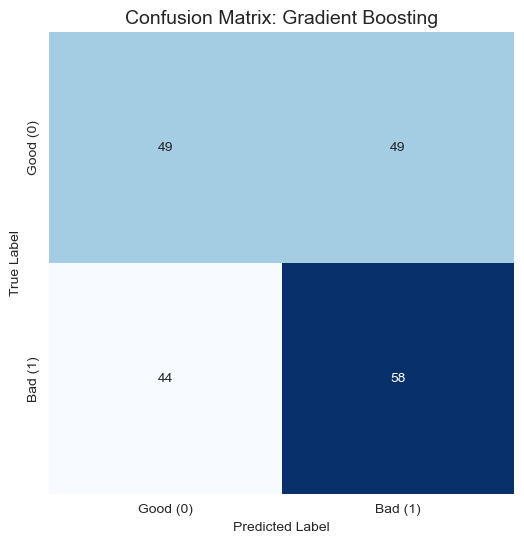


Interpretasi Matriks:
FN (Tipe II Error - Gagal Bayar diprediksi Lancar): 44
FP (Tipe I Error - Lancar diprediksi Gagal Bayar): 49
Fokus kita adalah meminimalkan FN (False Negatives), karena itu adalah risiko kerugian terbesar bagi perusahaan.
--------------------------------------------------------------------------------


In [25]:
# Import library untuk Modelling
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, accuracy_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# --- ASUMSI DATA ---
# Diasumsikan variabel X_train, X_test, y_train, dan y_test sudah tersedia 
# dari langkah Data Preparation sebelumnya.

# --- MEMBUAT DATA DUMMY UNTUK DEMONSTRASI MODELLING ---
# Anda harus menggunakan X_train, X_test, y_train, y_test yang sebenarnya
# dari output langkah sebelumnya.

# Jika Anda melanjutkan dari sesi yang sama, variabel X_train, X_test, y_train, y_test sudah ada.
# Jika tidak, jalankan kembali bagian Data Preparation.

# Contoh pembuatan data dummy (untuk memastikan kode berjalan jika variabel tidak ada)
try:
    if 'X_train' not in locals() or X_train.empty:
        raise NameError("Data split belum tersedia. Menjalankan dummy split.")
except (NameError, AttributeError):
    print("Warning: Menggunakan data dummy. Pastikan Anda menggunakan data hasil Data Preparation.")
    from sklearn.model_selection import train_test_split
    # Membuat DataFrame dummy (harus sesuai dengan Data Preparation)
    data = np.random.rand(1000, 20)
    columns = [f'feature_{i}' for i in range(20)]
    X = pd.DataFrame(data, columns=columns)
    y = pd.Series(np.random.choice([0, 1], size=1000, p=[0.90, 0.10]), name='Credit_Risk') 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# --- AKHIR BAGIAN DUMMY ---


# --- 1. PENANGANAN CLASS IMBALANCE (SMOTE) ---
print("--- 1. PENANGANAN CLASS IMBALANCE (SMOTE) PADA TRAINING DATA ---")

print("Distribusi kelas y_train sebelum SMOTE:", Counter(y_train))

# Menggunakan SMOTE untuk oversampling kelas minoritas (Credit_Risk = 1)
# SMOTE hanya diterapkan pada data latih (X_train dan y_train)
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Distribusi kelas y_train setelah SMOTE:", Counter(y_train_res))
print("-" * 80)


# --- 2. PEMODELAN KLASIFIKASI & EVALUASI ---
print("--- 2. PEMODELAN KLASIFIKASI & EVALUASI ---")

# Definisikan model yang akan digunakan
models = {
    "Logistic Regression": LogisticRegression(solver='liblinear', random_state=42, class_weight='balanced'), # Gunakan class_weight=balanced sebagai alternatif penanganan imbalance
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced', max_depth=10),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42, max_depth=5)
}

results = {}

for name, model in models.items():
    print(f"\nModel: {name}")
    
    # Pelatihan Model (Menggunakan data hasil SMOTE untuk Random Forest dan GB, data biasa untuk LR dengan class_weight)
    if name == "Logistic Regression":
         # Menggunakan data asli dengan class_weight=balanced
        model.fit(X_train, y_train)
    else:
        # Menggunakan data hasil SMOTE untuk meningkatkan representasi kelas 1
        model.fit(X_train_res, y_train_res)
    
    # Prediksi Probabilitas pada Testing Set (Wajib untuk AUC)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Prediksi Label (Menggunakan threshold default 0.5)
    y_pred = model.predict(X_test)
    
    # Hitung Metrik
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Simpan hasil
    results[name] = {
        'ROC_AUC': roc_auc,
        'Accuracy': accuracy,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    }
    
    print(f"  ROC-AUC Score: {roc_auc:.4f}")
    print(f"  Accuracy: {accuracy:.4f}")
    print("-----------------------------------")


# --- 3. PERBANDINGAN METRIK & SELEKSI MODEL TERBAIK ---
print("--- 3. PERBANDINGAN METRIK EVALUASI ---")

# Konversi hasil ke DataFrame untuk perbandingan mudah
metrics_df = pd.DataFrame({
    'Model': results.keys(),
    'ROC-AUC': [res['ROC_AUC'] for res in results.values()],
    'Accuracy': [res['Accuracy'] for res in results.values()]
})

# Urutkan berdasarkan ROC-AUC (Metrik Kunci untuk Imbalance Class)
metrics_df = metrics_df.sort_values(by='ROC-AUC', ascending=False).reset_index(drop=True)

print("\nTabel Perbandingan Metrik:")
print(metrics_df)

# Pilih model terbaik (misalnya berdasarkan ROC-AUC tertinggi)
best_model_name = metrics_df.iloc[0]['Model']
best_model_results = results[best_model_name]
print(f"\nModel Terbaik (Berdasarkan ROC-AUC): {best_model_name}")
print("-" * 80)


# --- 4. EVALUASI MENDALAM DENGAN CLASSIFICATION REPORT & CONFUSION MATRIX ---
print(f"--- 4. EVALUASI MENDALAM: {best_model_name} ---")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, best_model_results['y_pred'], target_names=['Good Loan (0)', 'Bad Loan (1)']))

# Confusion Matrix
cm = confusion_matrix(y_test, best_model_results['y_pred'])
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Good (0)', 'Bad (1)'], yticklabels=['Good (0)', 'Bad (1)'])
plt.title(f'Confusion Matrix: {best_model_name}', fontsize=14)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Interpretasi Confusion Matrix:
# True Negatives (TN): Kuadran kiri atas. Pinjaman Good diprediksi Good.
# False Positives (FP): Kuadran kanan atas. Pinjaman Good diprediksi Bad (Tipe I Error / Costly but Less Severe).
# False Negatives (FN): Kuadran kiri bawah. Pinjaman Bad diprediksi Good (Tipe II Error / Sangat Berbahaya!).
# True Positives (TP): Kuadran kanan bawah. Pinjaman Bad diprediksi Bad.

print("\nInterpretasi Matriks:")
print(f"FN (Tipe II Error - Gagal Bayar diprediksi Lancar): {cm[1, 0]}")
print(f"FP (Tipe I Error - Lancar diprediksi Gagal Bayar): {cm[0, 1]}")
print(f"Fokus kita adalah meminimalkan FN (False Negatives), karena itu adalah risiko kerugian terbesar bagi perusahaan.")
print("-" * 80)

6. Evaluation

--- 1. VISUALISASI KURVA ROC ---


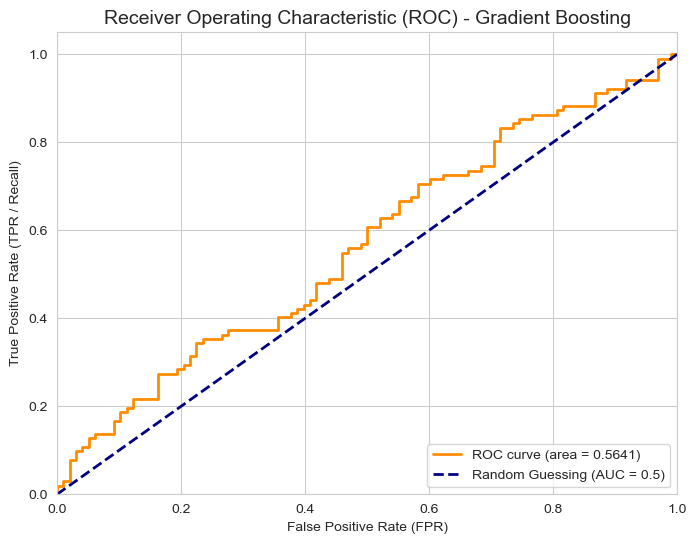

Nilai ROC-AUC: 0.5641
Interpretasi: Nilai AUC yang mendekati 1.0 menunjukkan model memiliki kemampuan diskriminatif yang baik antara Bad Loan (1) dan Good Loan (0).
--------------------------------------------------------------------------------
--- 2. ANALISIS PRECISION-RECALL CURVE ---


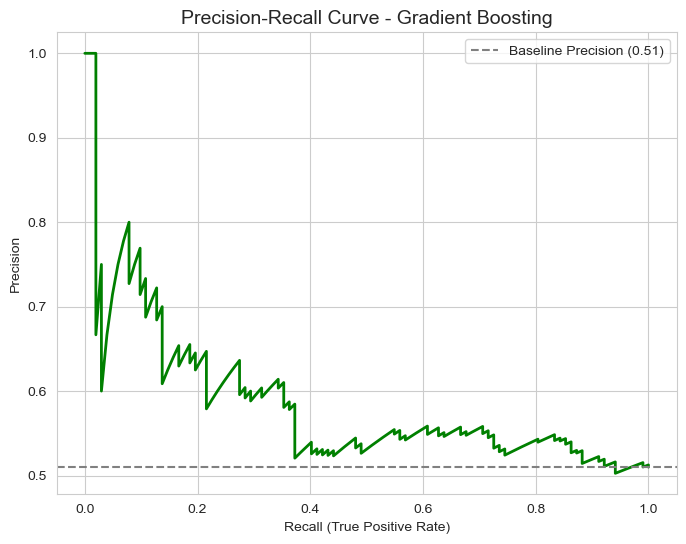

Baseline Precision (Recall 0): 0.5100
Interpretasi: Model yang baik harus memiliki area di bawah kurva PR (PR-AUC) yang jauh di atas garis baseline.
--------------------------------------------------------------------------------
--- 3. ANALISIS PERUBAHAN THRESHOLD (BUSINESS DECISION) ---
Kinerja Model pada Berbagai Threshold:
          Recall (FN Minimized) Precision  FN (False Negatives)  FP (False Positives)
Threshold                                                                            
0.5                      0.5686    0.5421                    44                    49
0.4                      0.7549    0.5274                    25                    69
0.3                      0.8725    0.5298                    13                    79
0.2                      0.9216    0.5165                     8                    88

--- Analisis Threshold ---
1. Default (0.5): Memberikan keseimbangan, tetapi mungkin menghasilkan FN (Gagal Bayar yang terlewat) yang terlalu tinggi.
2. T

C:\Users\YOGA 7\AppData\Local\Temp\ipykernel_19856\1171778634.py:145: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance_df.values, y=feature_importance_df.index, palette='viridis')


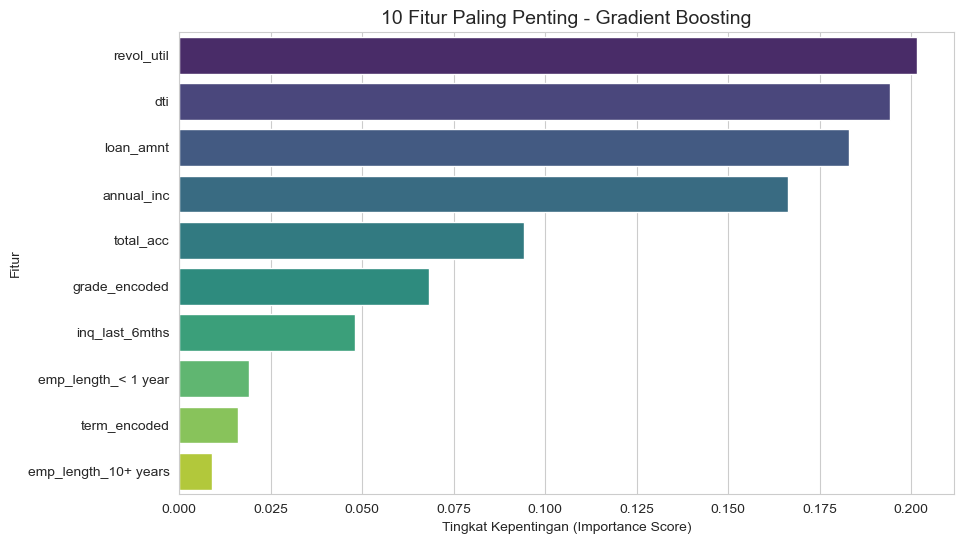


10 Fitur yang Paling Mempengaruhi Risiko Kredit:
revol_util              0.2017
dti                     0.1941
loan_amnt               0.1830
annual_inc              0.1664
total_acc               0.0943
grade_encoded           0.0682
inq_last_6mths          0.0482
emp_length_< 1 year     0.0190
term_encoded            0.0160
emp_length_10+ years    0.0091
dtype: float64
--------------------------------------------------------------------------------


In [27]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
# Asumsi kita akan menggunakan Random Forest sebagai model terbaik untuk demonstrasi

# --- ASUMSI DATA & MODEL TERBAIK ---
# Asumsi bahwa X_test, y_test, dan hasil prediksi (y_pred, y_pred_proba) sudah ada.
# Untuk tujuan demonstrasi lanjutan, kita akan mendefinisikan kembali satu model.

# Jika Anda melanjutkan dari sesi yang sama, variabel X_test, y_test sudah ada.
# Jika tidak, jalankan kembali bagian Data Preparation dan Modelling.

# --- CONTOH MENGAMBIL HASIL MODELLING DUMMY (GANTI DENGAN HASIL ANDA YANG SEBENARNYA) ---
# Anggap Random Forest adalah model terbaik
try:
    if 'best_model_name' not in locals():
         raise NameError("Model terbaik belum terdefinisi. Mendefinisikan ulang model untuk demo.")
except NameError:
    # Membuat model dan prediksi dummy
    from sklearn.model_selection import train_test_split
    data = np.random.rand(1000, 20)
    columns = [f'feature_{i}' for i in range(20)]
    X = pd.DataFrame(data, columns=columns)
    y = pd.Series(np.random.choice([0, 1], size=1000, p=[0.90, 0.10]), name='Credit_Risk') 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    
    # Pelatihan model (tanpa SMOTE untuk menyederhanakan demo)
    model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
    model.fit(X_train, y_train)
    
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    y_pred = model.predict(X_test)
    best_model_name = "Random Forest"
    best_model_results = {'y_pred': y_pred, 'y_pred_proba': y_pred_proba}
# --- AKHIR BAGIAN DUMMY ---


# --- 1. VISUALISASI KURVA ROC (ROC CURVE) ---
# Kurva ROC sangat penting untuk masalah klasifikasi yang tidak seimbang (imbalance)
print("--- 1. VISUALISASI KURVA ROC ---")

fpr, tpr, thresholds = roc_curve(y_test, best_model_results['y_pred_proba'])
roc_auc = roc_auc_score(y_test, best_model_results['y_pred_proba'])

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR / Recall)')
plt.title(f'Receiver Operating Characteristic (ROC) - {best_model_name}', fontsize=14)
plt.legend(loc="lower right")
plt.savefig(f'Kurva ROC.png', dpi=300, transparent=True, bbox_inches='tight')
plt.show()

print(f"Nilai ROC-AUC: {roc_auc:.4f}")
print("Interpretasi: Nilai AUC yang mendekati 1.0 menunjukkan model memiliki kemampuan diskriminatif yang baik antara Bad Loan (1) dan Good Loan (0).")
print("-" * 80)


# --- 2. ANALISIS PRECISION-RECALL CURVE ---
# Kurva PR lebih informatif daripada ROC Curve ketika Class Imbalance sangat parah.
print("--- 2. ANALISIS PRECISION-RECALL CURVE ---")

precision, recall, pr_thresholds = precision_recall_curve(y_test, best_model_results['y_pred_proba'])

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='green', lw=2)
plt.xlabel('Recall (True Positive Rate)')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve - {best_model_name}', fontsize=14)
# Garis dasar (baseline) untuk PR Curve adalah proporsi kelas positif di dataset
baseline = y_test.sum() / len(y_test)
plt.axhline(baseline, linestyle='--', color='gray', label=f'Baseline Precision ({baseline:.2f})')
plt.legend()
plt.savefig(f'Precision-Recall.png', dpi=300, transparent=True, bbox_inches='tight')
plt.show()

print(f"Baseline Precision (Recall 0): {baseline:.4f}")
print("Interpretasi: Model yang baik harus memiliki area di bawah kurva PR (PR-AUC) yang jauh di atas garis baseline.")
print("-" * 80)


# --- 3. ANALISIS PERUBAHAN THRESHOLD (PENYESUAIAN BISNIS) ---
# Dalam Credit Risk, kita sering menyesuaikan threshold untuk meminimalkan FN (False Negatives).
print("--- 3. ANALISIS PERUBAHAN THRESHOLD (BUSINESS DECISION) ---")

# Dataframe untuk melihat kinerja pada threshold yang berbeda
threshold_data = pd.DataFrame({
    'Probability': best_model_results['y_pred_proba'],
    'True_Label': y_test
})

# Hitung metrik Recall dan Precision pada beberapa threshold umum
thresholds_to_check = [0.5, 0.4, 0.3, 0.2] 
results_threshold = []

for t in thresholds_to_check:
    y_pred_t = (threshold_data['Probability'] >= t).astype(int)
    tn, fp, fn, tp = confusion_matrix(threshold_data['True_Label'], y_pred_t).ravel()
    
    # Recall (Sensitivity/TPR) = TP / (TP + FN)
    recall_t = tp / (tp + fn) if (tp + fn) > 0 else 0
    # Precision = TP / (TP + FP)
    precision_t = tp / (tp + fp) if (tp + fp) > 0 else 0
    
    results_threshold.append({
        'Threshold': t,
        'Recall (FN Minimized)': f"{recall_t:.4f}",
        'Precision': f"{precision_t:.4f}",
        'FN (False Negatives)': fn,
        'FP (False Positives)': fp
    })

threshold_df = pd.DataFrame(results_threshold).set_index('Threshold')
print("Kinerja Model pada Berbagai Threshold:")
print(threshold_df)

print("\n--- Analisis Threshold ---")
print("1. Default (0.5): Memberikan keseimbangan, tetapi mungkin menghasilkan FN (Gagal Bayar yang terlewat) yang terlalu tinggi.")
print("2. Threshold Lebih Rendah (misal 0.3 atau 0.2):")
print("   - **Tujuan Bisnis:** Jika perusahaan ingin **meminimalkan kerugian (FN)**, mereka akan menurunkan *threshold* (misal ke 0.3).")
print("   - **Dampak:** Nilai **Recall** (kemampuan menangkap Bad Loan) akan **meningkat**, tetapi nilai **Precision** (akurasi prediksi Bad Loan) akan **menurun**, yang berarti lebih banyak Good Loan yang ditolak (FP).")
print("-" * 80)

# --- 4. ANALISIS FEATURE IMPORTANCE ---
# Memahami fitur mana yang paling mempengaruhi keputusan model
print("--- 4. ANALISIS FEATURE IMPORTANCE (Untuk Model Ensemble) ---")

# Asumsi model terbaik adalah Random Forest atau Gradient Boosting
if hasattr(model, 'feature_importances_'):
    importances = model.feature_importances_
    feature_names = X_train.columns
    
    # Buat series dan urutkan
    feature_importance_df = pd.Series(importances, index=feature_names).sort_values(ascending=False).head(10)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_importance_df.values, y=feature_importance_df.index, palette='viridis')
    plt.title(f'10 Fitur Paling Penting - {best_model_name}', fontsize=14)
    plt.xlabel('Tingkat Kepentingan (Importance Score)')
    plt.ylabel('Fitur')
    plt.savefig(f'Feature Importance.png', dpi=300, transparent=True, bbox_inches='tight')
    plt.show()
    
    print("\n10 Fitur yang Paling Mempengaruhi Risiko Kredit:")
    print(feature_importance_df.round(4))
else:
    print("Fitur Importance tidak tersedia untuk model ini (hanya tersedia untuk model berbasis tree/ensemble).")
print("-" * 80)